In [252]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

fresh = pd.read_csv('freshdirect.csv')
fresh.head()

,brand,category1,category2,category3,category4,price,pro_index,product
0,Silk,Dairy,"Milk, Plant-Based",Nut,Almond,4.29,35,"PureAlmond All-Natural Almond Milk, Unsweetene..."
1,Silk,Dairy,"Milk, Plant-Based",Other,NaN,5.29,35,"Oat Yeah Oatmilk, Plain, Carton"
2,Califia Farms,Dairy,"Milk, Plant-Based",Nut,Almond,4.99,35,"Almond Milk, Vanilla, Plastic Bottle"
3,Califia Farms,Dairy,"Milk, Plant-Based",Nut,Almond,NaN,35,"Almond Milk, Original, Plastic Bottles"
4,Califia Farms,Dairy,"Milk, Plant-Based",Nut,Almond,4.99,35,"Almond Milk, Original, Plastic Bottle"


In [253]:
fresh.shape

(183, 8)

In [254]:
#removing duplicate product inputs (different carton size, etc.)
fresh = fresh.drop_duplicates(['product'])
fresh.shape

(169, 8)

In [255]:
#first input means higher popularity because of the filtering at the website, 
#data was scraped in the order of popularity.
#adding a column to indicate the ranking.
fresh['popularity'] = np.arange(len(fresh)+1,1,-1)


In [256]:
fresh.head()

,brand,category1,category2,category3,category4,price,pro_index,product,popularity
0,Silk,Dairy,"Milk, Plant-Based",Nut,Almond,4.29,35,"PureAlmond All-Natural Almond Milk, Unsweetene...",170
1,Silk,Dairy,"Milk, Plant-Based",Other,NaN,5.29,35,"Oat Yeah Oatmilk, Plain, Carton",169
2,Califia Farms,Dairy,"Milk, Plant-Based",Nut,Almond,4.99,35,"Almond Milk, Vanilla, Plastic Bottle",168
3,Califia Farms,Dairy,"Milk, Plant-Based",Nut,Almond,NaN,35,"Almond Milk, Original, Plastic Bottles",167
4,Califia Farms,Dairy,"Milk, Plant-Based",Nut,Almond,4.99,35,"Almond Milk, Original, Plastic Bottle",166


In [257]:
#In total, there are three large categories, 12 smaller categories, and 25 smallest categories.
fresh.nunique()

brand          35
category1       3
category2      12
category3      25
category4      14
price          38
pro_index       3
product       169
popularity    169
dtype: int64

In [129]:
fresh.set_index('category1')
brand = fresh.groupby("brand").count()[['product']].sort_values('product', ascending=False)

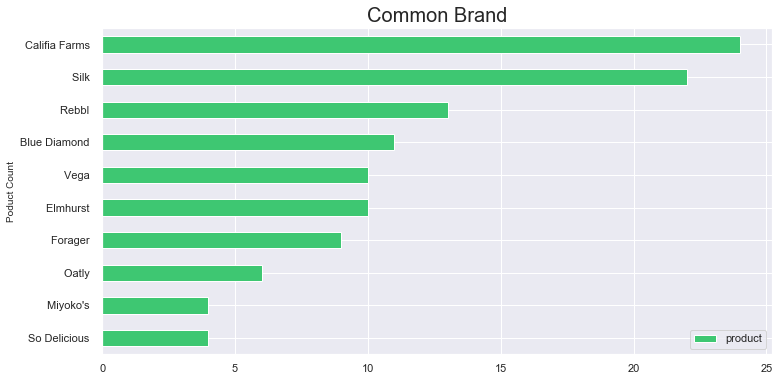

In [334]:
###### Product EDA #######


#First EDA: most popular products in the "plant-based" filtered.
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (12, 6)})

#plt.despine(left=True)
ax = brand.head(10).plot.barh(color='#3EC772')
ax.invert_yaxis()
plt.xlabel("").set_fontsize('20')
plt.ylabel("Poduct Count").set_fontsize('10')
plt.title("Common Brand").set_fontsize('20')

##There are a lot of protein-drinks, shakes, almond-based drinks in the top ranked brands. Alternative dairy?

In [279]:
#product count by 3 categories
prod = fresh.groupby(['category1', 'category2']).count().sort_values("product", ascending=False)[["product"]]
prod = prod.reset_index()
prod
#Product items sold most commonly (or have highest varities) are Dairy alternatives such as plant-based milk in the categories of
#Nut, Smoothies&Blends, and Other.  In addition, plant-based cream & creamers had secondly highest varieties.

##It is assumed tht these are poularily sought out products and Freshdirect keep them in the stock.

,category1,category2,product
0,Dairy,"Milk, Plant-Based",104
1,Grocery,Pantry,15
2,Dairy,Cream & Creamers,14
3,Grocery,Health & Beauty,10
4,Dairy,Plant-Based & Vegetarian,8
5,Dairy,Yogurt,7
6,Dairy,Packaged Cheese,3
7,Frozen,Meat Alternatives,3
8,Frozen,Ice Cream & Treats,2
9,Dairy,Butter & Margarine,1


Text(0.5, 1, 'Poducts by Category #1 and #2')

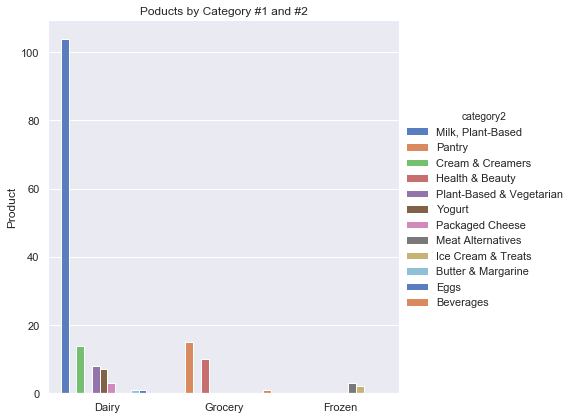

In [379]:
#stacked bar chart for product number by categories


barWidth = 0.25

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (80, 30)})

g = sns.catplot(x="category1", y="product", hue="category2", data=prod,
                height=6, palette="muted", kind="bar")
g.despine(left=True)
g.set_ylabels("Product")
g.set_xlabels("")
plt.title("Poducts by Category #1 and #2")

##This chart clearly displays that Milk, Plant-Based products in the dairy section are very populary or sought-out 
#products.

In [386]:

no_milk = prod.loc[prod['category2'] != 'Milk, Plant-Based ',]
sorted(no_milk.category1)

['Dairy',
 'Dairy',
 'Dairy',
 'Dairy',
 'Dairy',
 'Dairy',
 'Frozen',
 'Frozen',
 'Grocery',
 'Grocery',
 'Grocery']

Text(0.5, 1, 'Poducts by Category #1 and #2')

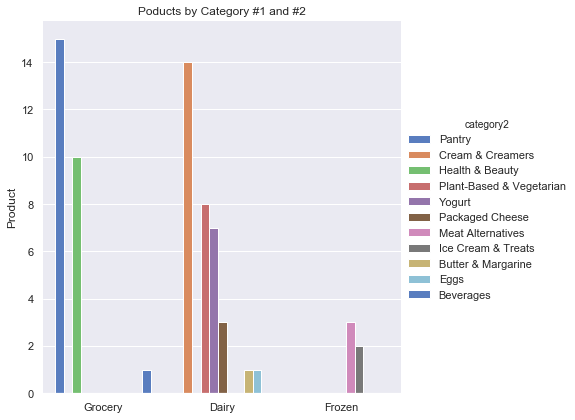

In [412]:
#Because the dairy products are such an outlier, now I removed it from the dataframe and created a new chart
#without it.
#Even on this chart, for Grocery, the Pantry (bulk items for dairy) and for grocery, Cream & Creamers or yogurt are high on the list.
#Note now the dairy is in the middle of the chart.

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (80, 30)})

barWidth = 0.3
g = sns.catplot(x="category1", y="product", hue="category2", data=no_milk,
                height=6, palette="muted", kind="bar")
g.despine(left=True)
g.set_ylabels("Product")
g.set_xlabels("")
plt.title("Poducts by Category #1 and #2")

In [285]:
fresh2_sum = fresh.groupby(['category1', 'category2', "category3"]).agg({'popularity':['sum']}).reset_index()
fresh2_sum.columns = (["category1", "category2", "category3", "popularity_index_sum"])

fresh2_sum.sort_values("popularity_index_sum", ascending=False)

,category1,category2,category3,popularity_index_sum
4,Dairy,"Milk, Plant-Based",Nut,4299
7,Dairy,"Milk, Plant-Based",Smoothies & Blends,1873
2,Dairy,Cream & Creamers,Plant-Based,1456
5,Dairy,"Milk, Plant-Based",Other,1019
13,Dairy,Yogurt,Non-Dairy,787
12,Dairy,Plant-Based & Vegetarian,Soy & Non-Dairy Cheese,721
8,Dairy,"Milk, Plant-Based",Soy,612
24,Grocery,Pantry,Soup & Meals,565
1,Dairy,Cream & Creamers,Creamers,396
20,Grocery,Pantry,Canned Goods,372


/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



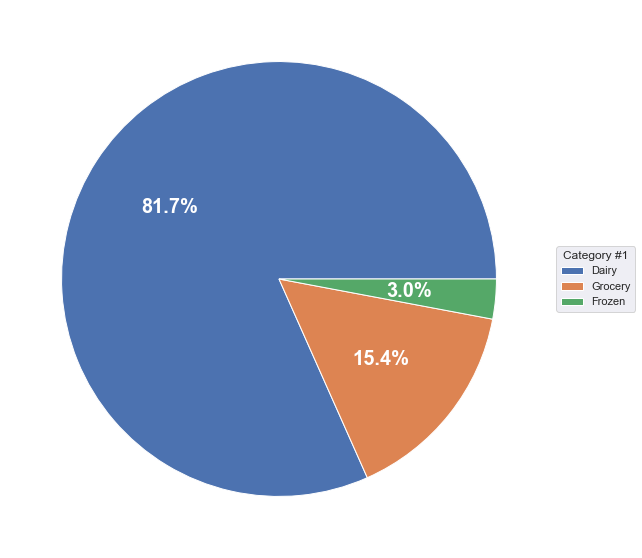

In [409]:
## Category 1 Pie Chart##

#I understand a pie chart is not recommended, just wanted to understand the dynamics (ratio) of the product in the
#first category. This again shows the dairy sectin's popularity dramatically.

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

# mypie, _ = ax.pie(prod1['product'], radius=1.3, colors=[a(0.6), b(0.6), c(0.6)], labels=prod1.index)
# plt.setp( mypie, width=0.3, edgecolor='white')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)


wedges, texts, autotexts = ax.pie(prod1, autopct=lambda pct: func(pct, prod1['product']),
                                  textprops=dict(color="w"))

ax.legend(wedges, prod1.index,
          title="Category #1",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=20, weight="bold")


plt.show()

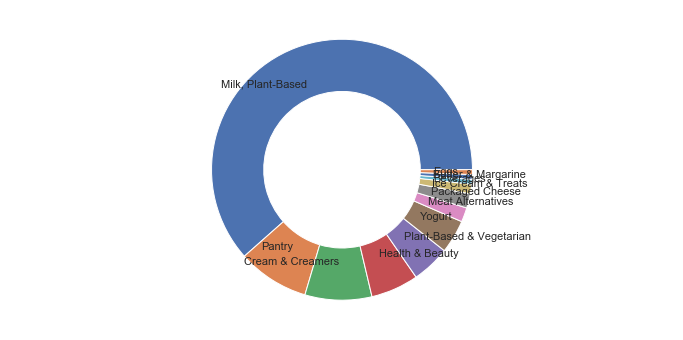

In [351]:


fig, ax = plt.subplots()
ax.axis('equal')

# Second Ring (Inside)
mypie2, _ = ax.pie(prod2['product'], radius=1.3-0.3, labeldistance=0.7, labels=prod2.index) #colors="Set3"
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
    

# show it
plt.show()

In [341]:
prod1 = fresh.groupby(['category1']).count().sort_values("product", ascending=False)[["product"]]
prod1

,product
category1,
Dairy,138
Grocery,26
Frozen,5


In [344]:
prod2 = fresh.groupby(['category2']).count().sort_values("product", ascending=False)[["product"]]
prod2

,product
category2,
"Milk, Plant-Based",104
Pantry,15
Cream & Creamers,14
Health & Beauty,10
Plant-Based & Vegetarian,8
Yogurt,7
Meat Alternatives,3
Packaged Cheese,3
Ice Cream & Treats,2


In [183]:
fresh2 = fresh.groupby(['category1', 'category2', "category3"]).agg({'popularity':['median']}).reset_index()
fresh2.columns = (["category1", "category2", "category3", "popularity_index_median"])

fresh2.sort_values("popularity_index_median", ascending=False)

,category1,category2,category3,popularity_index_median
21,Grocery,Pantry,"Coffee, Tea & Cocoa",166.5
1,Dairy,Cream & Creamers,Creamers,158.0
2,Dairy,Cream & Creamers,Plant-Based,150.0
6,Dairy,"Milk, Plant-Based",Rice,147.0
10,Dairy,Packaged Cheese,Shredded & Grated,142.0
11,Dairy,Packaged Cheese,Sliced,138.0
22,Grocery,Pantry,"Nuts, Seeds & Dried Fruit",135.0
24,Grocery,Pantry,Soup & Meals,131.0
20,Grocery,Pantry,Canned Goods,130.0
14,Frozen,Ice Cream & Treats,Non-Dairy & Soy,129.0


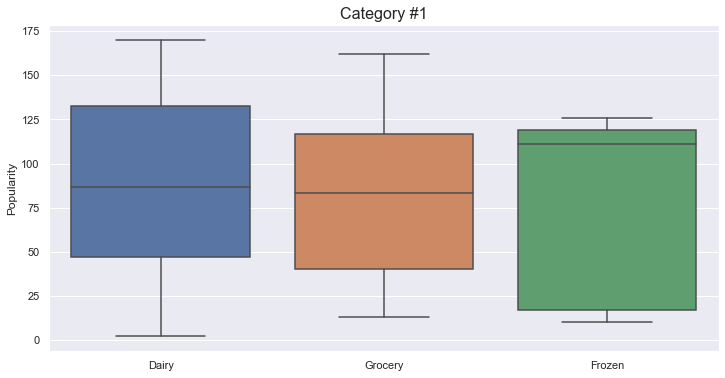

In [258]:
###### Popularity EDA #######

#Even though from the point of product counts, "Dairy" was the highest one, from popularity persepective, 
#Frozen had highest median score.
#Question: What are the popular products in Frozen item?? "Ice cream" ("Superfood Ice cream")

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.boxplot(x="category1",y='popularity', data=fresh)
plt.xlabel("")
plt.ylabel("Popularity").set_fontsize('12')
plt.title("Category #1").set_fontsize('16')

In [215]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [173]:
fresh3 = fresh2.groupby('category3').agg({'popularity_index':"mean"})#.sort_values(by="popularity_index",ascending=False)


fresh3

,popularity_index
category3,
Bacon & Sausage,159
Burgers,10
Canned Goods,414
"Coffee, Tea & Cocoa",333
Cream Cheese,96
Creamers,438
Diet & Nutrition,323
Egg Products,119
Margarine,121


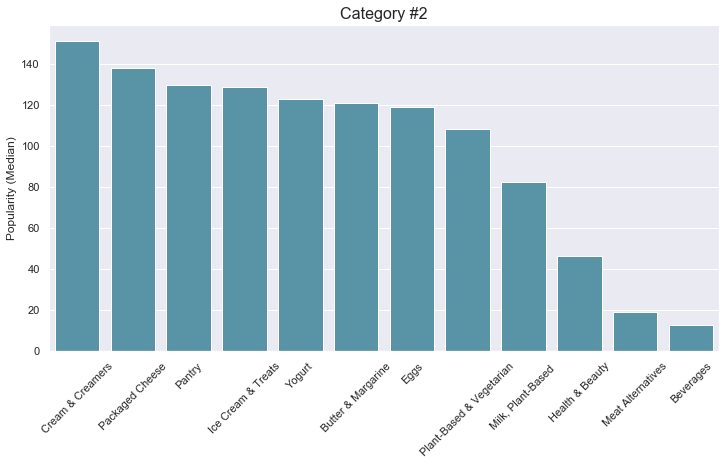

In [249]:
### Category 2 - Popularity Median Analysis 
## Despite of the coverage of products in the milk, plant-based section, "creamers", "packaged cheese", 
#and "ice cream" were more "popular" items in the Freshdirect.com. 
#Since it is not clear that their ranking of popularity is based on the sales (or review although review pages 
#does not exit in the freshdirect), 

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
chart = sns.barplot(x="category2", y="popularity", data=cat2, ax=ax, color=(0.3, 0.6, 0.7, 0.6))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel("")
plt.ylabel("Popularity (Median)").set_fontsize('12')
plt.title("Category #2").set_fontsize('16')

#Chart Summary:
#from both poularity and product count perspectives, meat alternatives are still reached its potential yet. 
#if you are in the food insutry - especially in the vegan/vegetarian market, there is still a lof of room to
#wiggle in in the dairy field such as alternative milk, creamers, cheese, yogurt, ice cream etc.

In [250]:
cat2 = fresh.groupby('category2').agg({"popularity":"median"}).sort_values(by="popularity", ascending=False)
cat2 = cat2.reset_index()
cat2

,category2,popularity
0,Cream & Creamers,151.5
1,Packaged Cheese,138.0
2,Pantry,130.0
3,Ice Cream & Treats,129.0
4,Yogurt,123.0
5,Butter & Margarine,121.0
6,Eggs,119.0
7,Plant-Based & Vegetarian,108.5
8,"Milk, Plant-Based",82.5
9,Health & Beauty,46.5


In [415]:
#Boxplot 2 for category 2 - bar chart above was preferred.

# fig_dims = (12, 6)
# fig, ax = plt.subplots(figsize=fig_dims)
# sns.set(style="darkgrid")
# sns.boxplot(x="category2",y='popularity', data=fresh)
# plt.xlabel("")
# plt.ylabel("Popularity").set_fontsize('12')
# plt.title("Category #2").set_fontsize('16')

In [318]:
cat3 = fresh.groupby('category3').agg({"popularity":"median"}).sort_values(by="popularity", ascending=False)
cat3 = cat3.reset_index()
cat3

,category3,popularity
0,"Coffee, Tea & Cocoa",152.5
1,Creamers,144.0
2,Plant-Based,136.0
3,Rice,133.0
4,Shredded & Grated,128.0
5,Sliced,124.0
6,"Nuts, Seeds & Dried Fruit",121.0
7,Soup & Meals,117.0
8,Canned Goods,116.0
9,Non-Dairy & Soy,115.0


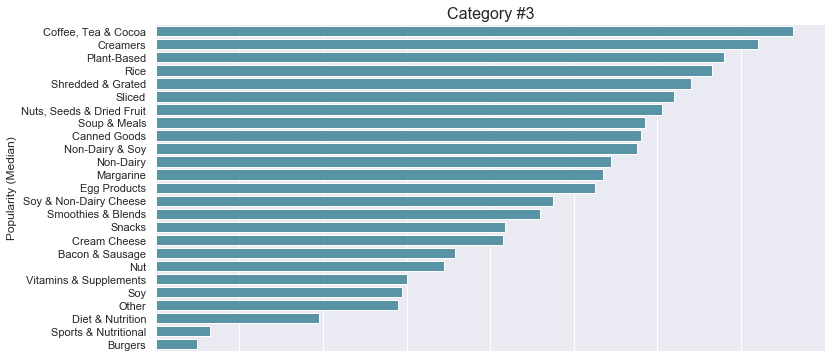

In [327]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
chart = sns.barplot(x="popularity", y="category3", data=cat3, ax=ax, color=(0.3, 0.6, 0.7, 0.6))
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.xlabel("")
plt.ylabel("Popularity (Median)").set_fontsize('12')
plt.title("Category #3").set_fontsize('16')
sns.despine(left=True, bottom=True)

In [ ]:
#### Conclusion ####
#from both poularity and product count perspectives, meat alternatives are still reached its potential yet. 
#if you are in the food insutry - especially in the vegan/vegetarian market, there is still a lof of room to
#wiggle in in the dairy field such as alternative milk, creamers, cheese, yogurt, ice cream etc.